In [34]:
# Install NLTK if you haven't already: pip install nltk
import nltk
from nltk.corpus import twitter_samples
from nltk.tokenize import word_tokenize
from nltk import classify, NaiveBayesClassifier
from nltk.sentiment import SentimentAnalyzer
from nltk.classify.util import apply_features

In [35]:
# Download the Twitter dataset from NLTK (you only need to do this once)
nltk.download('twitter_samples')
nltk.download('punkt')

[nltk_data] Error loading twitter_samples: <urlopen error [WinError
[nltk_data]     10060] A connection attempt failed because the
[nltk_data]     connected party did not properly respond after a
[nltk_data]     period of time, or established connection failed
[nltk_data]     because connected host has failed to respond>
[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [36]:
# Load positive and negative Twitter data
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [37]:
# Tokenize the tweets
positive_tokens = [word_tokenize(tweet) for tweet in positive_tweets]
negative_tokens = [word_tokenize(tweet) for tweet in negative_tweets]

In [38]:
# Define a function for feature extraction
def extract_features(tokens):
    return {word: True for word in tokens}


In [39]:
# Prepare the data for classification
positive_data = [(extract_features(tokens), 'Positive') for tokens in positive_tokens]
negative_data = [(extract_features(tokens), 'Negative') for tokens in negative_tokens]


In [40]:
# Split the data into training and testing sets
training_data = apply_features(extract_features, positive_data[:4000] + negative_data[:4000])
testing_data = apply_features(extract_features, positive_data[4000:] + negative_data[4000:])


In [41]:
# Train a Naive Bayes classifier
sentiment_analyzer = SentimentAnalyzer()
classifier = NaiveBayesClassifier.train(training_data)


In [42]:
# Evaluate the classifier
accuracy = classify.accuracy(classifier, testing_data)
print("Classifier Accuracy:", accuracy)


Classifier Accuracy: 0.973


In [43]:
# Perform sentiment analysis on a custom tweet
custom_tweet = "I hate Python !"
custom_tokens = word_tokenize(custom_tweet)
custom_features = extract_features(custom_tokens)

sentiment = classifier.classify(custom_features)
print(f"Sentiment of the custom tweet: {sentiment}")

Sentiment of the custom tweet: Negative


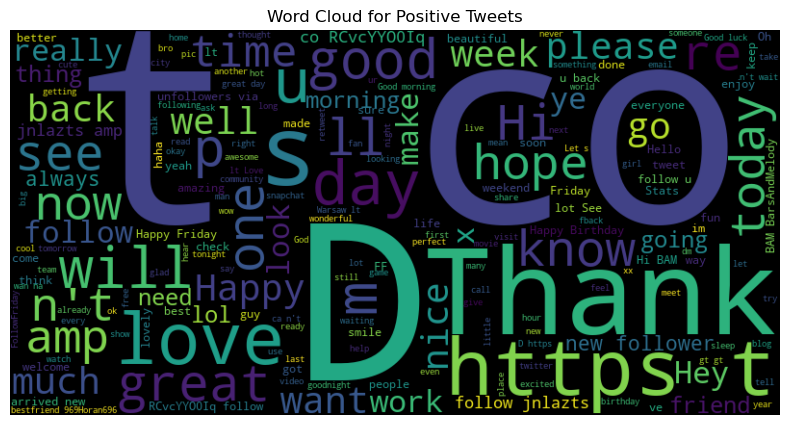

In [45]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all positive and negative tokens into one list
all_positive_tokens = [token for tokens in positive_tokens for token in tokens]
all_negative_tokens = [token for tokens in negative_tokens for token in tokens]

# Convert the lists to strings
all_positive_text = ' '.join(all_positive_tokens)
all_negative_text = ' '.join(all_negative_tokens)

# Create WordCloud for positive tweets
positive_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Tweets')
plt.axis('off')
plt.show()



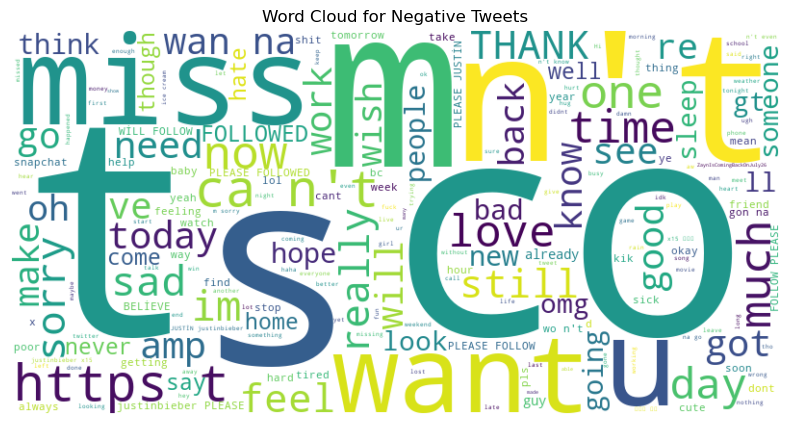

In [46]:
# Create WordCloud for negative tweets
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Tweets')
plt.axis('off')
plt.show()


In [1]:
pip install wordcloud

In [ ]:
pip3 install wordcloud